In [139]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df = pd.read_csv('../input/insurance/insurance.csv')

/kaggle/input/insurance/insurance.csv


# Medical Cost Analysis
1. **Objectives and Scope**
2. **Data Cleaning & Preparation**
3. **Exploratory Data Analysis (EDA)**
4. **Actionable Plan**

# 1. Objectives and Scope
**Cost Drivers Analysis:** Identify the key factors that contribute to medical charges based on the provided features such as age, sex, BMI, number of children, smoking status, and region.

**Smoking Impact Assessment:** Investigate the impact of smoking on medical charges and determine if there is a significant difference in charges between smokers and non-smokers.

**Regional Cost Variation:** Analyze how medical charges vary across different regions and identify any regional trends or disparities.

**BMI and Health Costs:** Examine the relationship between Body Mass Index (BMI) and medical charges to understand the potential influence of weight on healthcare costs.

**Children and Family Impact:** Explore whether having children affects medical charges and investigate if there are differences in charges based on the number of children.


# 2. Data Cleaning & Preparation
Preparing data for analysis. This includes handling missing values, converting data types, transforming categorical variables, and overall getting the dataset into a format suitable for analysis. 


In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
# Checking for any null values. In this case we have none! 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [142]:
# Checking for any duplicate values. We have one in this case on rows 195 and 581. 
duplicate_rows = df[df.duplicated(keep = False)]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [143]:
# Dropping duplicates.
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [144]:
# Converting these columns into numerical values using pandas. 
labels_cols = ['sex', 'smoker','region']
for col in labels_cols: 
    df[col] = pd.factorize(df[col])[0]
df['smoker'] = 1 - df['smoker']

In [145]:
# Viewing the correlation between different columns and 'charges'
df.corr()['charges'].sort_values()

region      0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

# Step 3: Exploratory Data Analysis 
Exploration of data to uncover patterns, trends, and potential insights. Including application of statistical techniques, interpreting results of correlation analysis, and gaining understanding of data's characteristics. 

<Axes: >

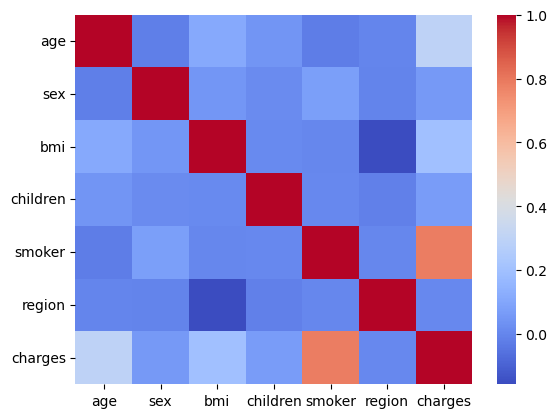

In [146]:
# Visualizing the correlation and in this case we see a storng correlation between smoking and charges
corr = df.corr()
sns.heatmap(corr,cmap = "coolwarm")

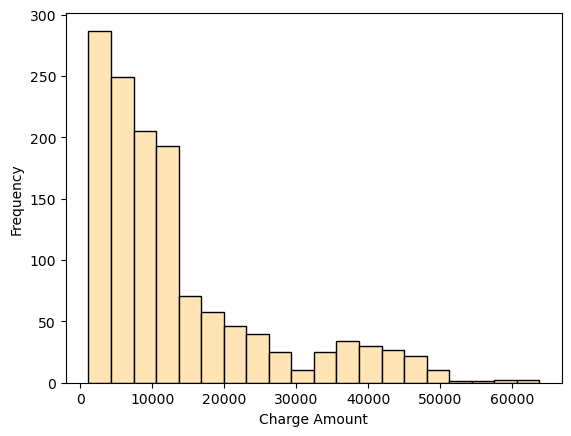

In [147]:
# Viewing Distribution of Charge Amounts. In this case we see a majority seems to be around the $0 - $10,000 range. 
plt.hist(df['charges'], bins = 20, color = 'moccasin', edgecolor = 'black')

plt.xlabel('Charge Amount')
plt.ylabel('Frequency')
plt.show()

**Effects of Smoking on Medical Bill

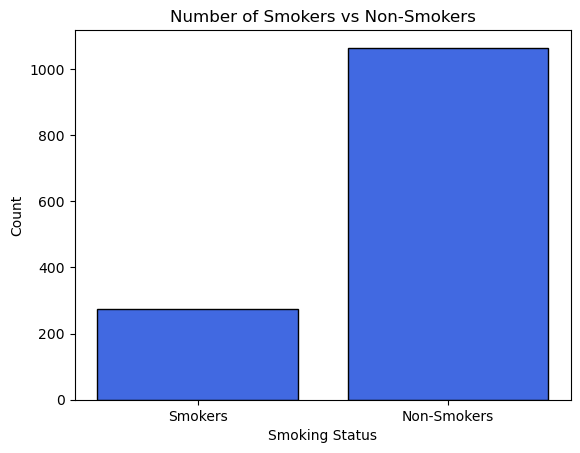

In [165]:
# Visualizing number of smokers vs non-smokers. There is a significant amount more of non-smokers compared to smokers. 
smoke = (df['smoker']==1).sum()
nonsmoke = (df['smoker']==0).sum() 
smoker = ['Smokers','Non-Smokers']
combined = [smoke,nonsmoke]

plt.bar(smoker, combined, color='royalblue', edgecolor='black')

plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Number of Smokers vs Non-Smokers')

plt.show()

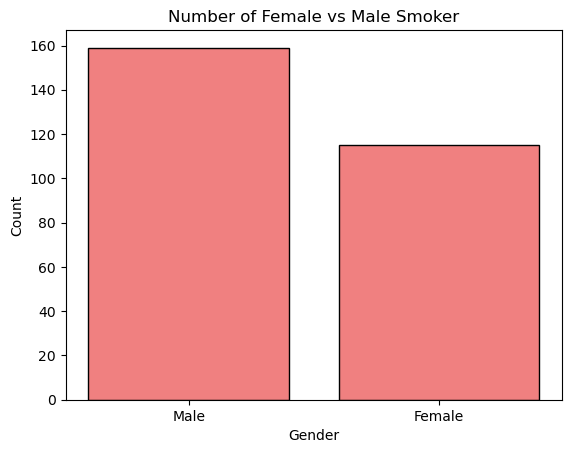

In [149]:
# Visualizing Male vs Female Smoker. There are more male smokers than female smokers. 
ms = (df[(df['sex'] == 1) & (df['smoker'] == 1)]).shape[0] #ms = male smoker 
fs = (df[(df['sex'] == 0) & (df['smoker'] == 1)]).shape[0] #fs = female smoker

gender = ['Male','Female']
combined2 = [ms,fs]

plt.bar(gender, combined2, color=['lightcoral'], edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Female vs Male Smoker')

plt.show()

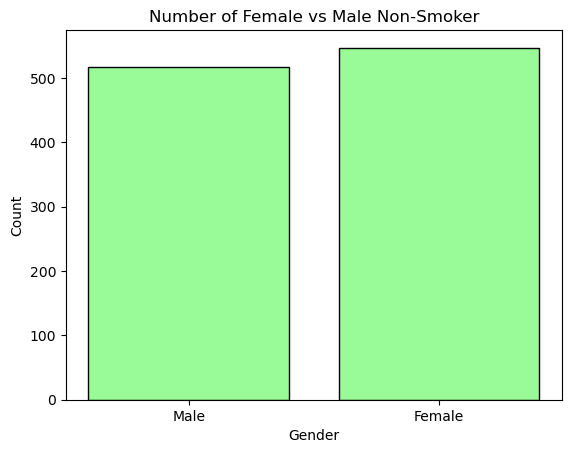

In [150]:
# Visualizing Male vs Female Non-Smoker
mns = (df[(df['sex'] == 1) & (df['smoker'] == 0)]).shape[0] #mns = male non smoker
fns = (df[(df['sex'] == 0) & (df['smoker'] == 0)]).shape[0] #fns = female non smoker

gender1 = ['Male','Female']
combined3 = [mns,fns]

plt.bar(gender1, combined3, color=['palegreen'], edgecolor='black')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Female vs Male Non-Smoker')

# Show the plot
plt.show()

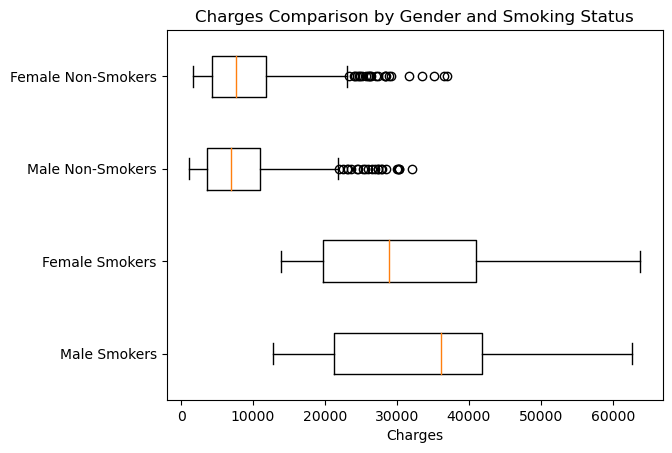

In [151]:
# Box Plot of Gender and Smokers in relation to medical charges. 
# Smokers observed a significantly higher medical cost compared to non-smokers.

data = [
    df[(df['sex'] == 1) & (df['smoker'] == 1)]['charges'],  # Male smokers
    df[(df['sex'] == 0) & (df['smoker'] == 1)]['charges'],  # Female smokers
    df[(df['sex'] == 1) & (df['smoker'] == 0)]['charges'],  # Male non-smokers
    df[(df['sex'] == 0) & (df['smoker'] == 0)]['charges']   # Female non-smokers
]

labels = ['Male Smokers', 'Female Smokers', 'Male Non-Smokers', 'Female Non-Smokers']

plt.boxplot(data, vert=False, labels=labels)

plt.xlabel('Charges')
plt.title('Charges Comparison by Gender and Smoking Status')

plt.show()

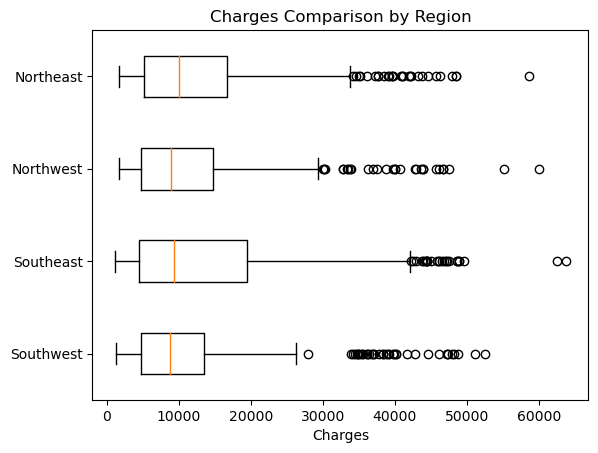

In [152]:
# Box Plot of Region in relation with charges. 
regions = [
    df[df['region'] == 0]['charges'],  # Southwest
    df[df['region'] == 1]['charges'],  # Southeast
    df[df['region'] == 2]['charges'],  # Northwest
    df[df['region'] == 3]['charges']   # Northeast
]

labels = ['Southwest', 'Southeast', 'Northwest', 'Northeast']

plt.boxplot(regions, vert=False, labels=labels)

plt.xlabel('Charges')
plt.title('Charges Comparison by Region')

plt.show()

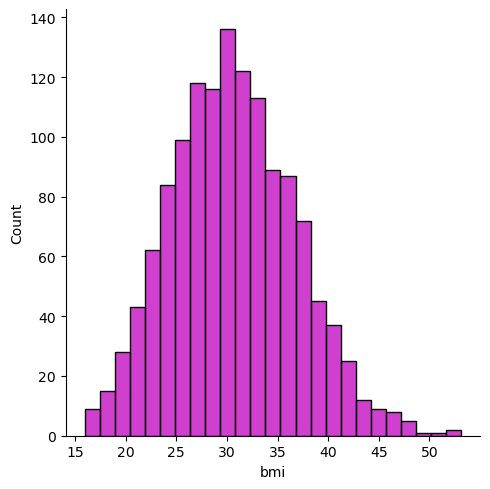

In [153]:
# Distribution of bmi. It forms a bell curve with an average of bmi of 30 which is obese. 
sns.displot(df["bmi"], color = 'm')

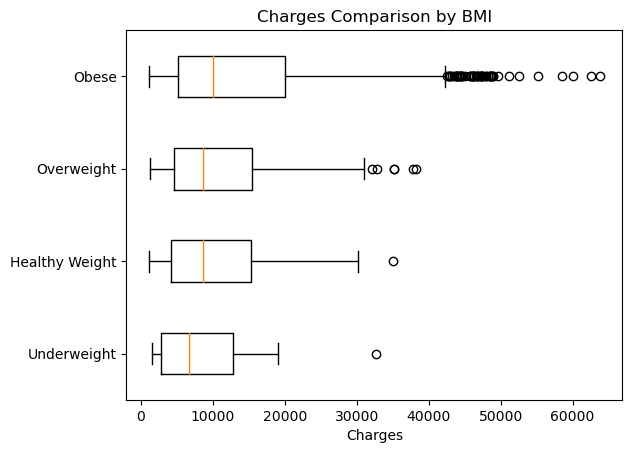

In [154]:
# Box Plot demonstrating charges compared to BMI. We see that those who are obese have a higher average medical bill. 
bmi = [
    df[df['bmi'] <=18.5]['charges'],  # Underweight
    df[(df['bmi'] >= 18.5) & (df['bmi'] < 25)]['charges'],  # Healthy Weight
    df[(df['bmi'] >= 25) & (df['bmi'] < 30)]['charges'],  # Over Weight
    df[df['bmi'] >=30]['charges']   # Obese
]

labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']

plt.boxplot(bmi, vert=False, labels=labels)

plt.xlabel('Charges')
plt.title('Charges Comparison by BMI')

plt.show()


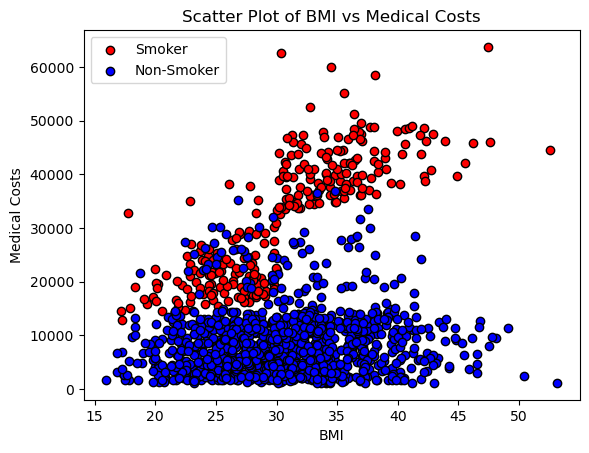

In [155]:
# Scatter plot of smokers and bmi against medical costs. 
# We see a positive correlation between being a smoker, having a higher bmi and a higher medical bill. 

sb = df[(df['smoker'] == 1)]
plt.scatter(sb['bmi'],sb['charges'], color = 'red', edgecolor = 'black', label = 'Smoker')
nsb = df[(df['smoker'] == 0)]
plt.scatter(nsb['bmi'],nsb['charges'], color = 'blue', edgecolor = 'black', label = 'Non-Smoker')
plt.xlabel('BMI')
plt.ylabel('Medical Costs')
plt.title('Scatter Plot of BMI vs Medical Costs')

plt.legend()

plt.show()

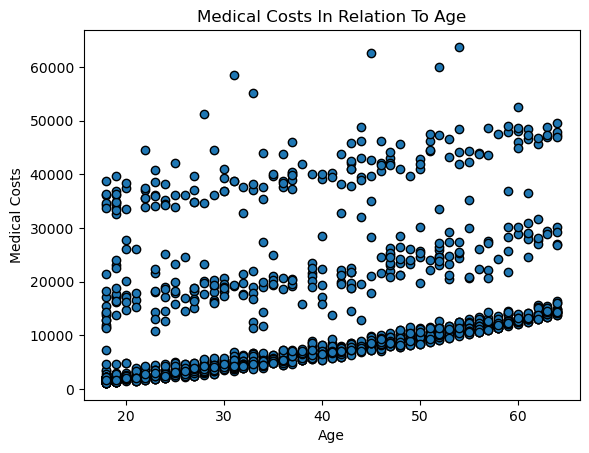

In [158]:
# Plotting Age against Charges to see if there is a correlation.
# We observe consistency in medical costs increasing as age increases. 
plt.scatter(df['age'],df['charges'], edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Medical Costs')
plt.title('Medical Costs In Relation To Age')
plt.show()

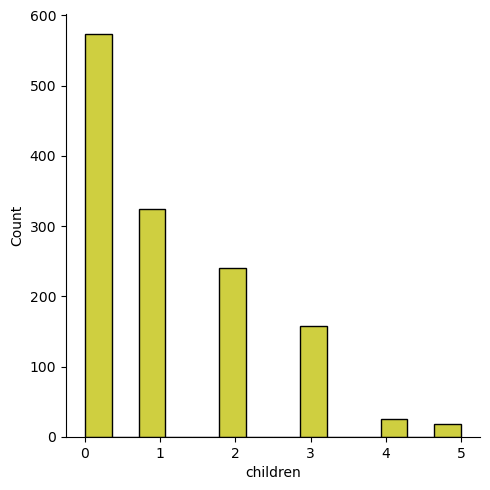

In [162]:
# Histogram of patient children frequency. 
sns.displot(df["children"], color = 'y')

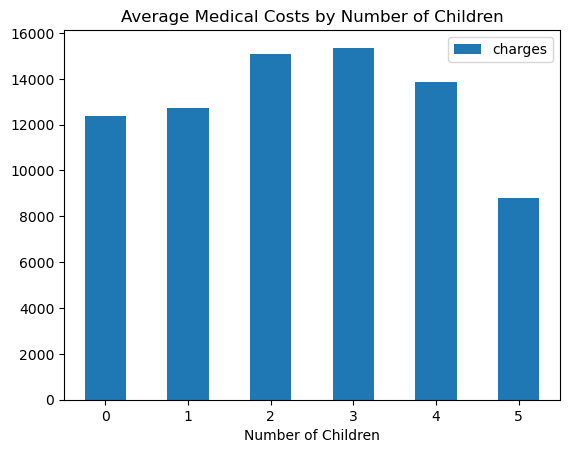

In [182]:
# Bar graph of Medical Costs in relation to number of children.
# Its seems that those with two to three children have the most medical bills according to this data set. 
ch = df.loc[:, ['children','charges']].groupby('children').mean()
ax = ch.plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Number of Children')
plt.title('Average Medical Costs by Number of Children')
plt.show()

# Step 4: Actionable Plan
You may be wondering why analysis of this data set is important and why it's relevant to me? Looking at these graphs and analyses we can observe that being a smoker and having a higher bmi as well as being older all increase your chances of disease and thus increasing medical bills. 

That's obvious Alec, give us the real importance!" 

Well, with the the increased presence of processed foods in our diets nowadays. We are prone to overconsume and eat more than our caloric limit each day and with the lack of excercise. We observe an increase an BMI and increase our chances of disease.

**Now why is this relevant to me?**

![](https://i.gifer.com/2a2t.gif)

I was once in the BMI category of Obese having a **BMI of over 35** and an **active smoker**. This project had given me alarming statistics and visualization that I was heading towards a path of disease and expensive medical bills and I had to change my lifestyle. 

High BMI Tips: 
1. **Observation:** Be aware of what you are consuming and attempt to place a caloric value on it. A majority of people underestimate the amount of calories each food has. One meal of a Burger, Medium French Fries, and a Medium Soda has **HALF** of your **Daily Caloric Intake**.
2. **Environment:** One [study](https://pubmed.ncbi.nlm.nih.gov/22390518/) done demonstrated that environment plays a large factor in food selection. Placing healthier foods in visible sight and 'junk' food in places that are hard to reach like the very top cabinet reduces your chances of eating the 'junk' food. 
3. **Get Active:** While **caloric intake** may consist of **80%** of **weight loss**. Building muscle assists in this journey increasing the number of calories burnt during rest. 

Actionable Plan: 
1. Examine household environment and eliminating 'junk' food or placing them in a hard to reach location. 
2. Make a list of groceries trying to limit processed foods. 
3. Prepare meals ahead of time. Prepare once a week and so you don't have to worry about what to eat when you get hungry.
4. Observe what you eat on a daily basis, really try make a food journal and document each food consumed. 
5. Track your weight every day and make an average for each week. If the weekly average does not decrease, go back to steps 1-4 and really determine if something went wrong there. 
6. Optional: Sign up for a gym with someone who can keep you accountable. This will help with weight loss but is not necessary. 

Smoking Tips: 
1. **Environment:** Like I mentioned before, environment will be your biggest factor here. Another [study](https://pubmed.ncbi.nlm.nih.gov/27650054/#:~:text=Robins'%20studies%20found%20high%20rates,the%20drug%20after%20their%20return.) done by Lee Robins' saw that **34% of US Vietnam Veterans** were **addicted** to **heroin**, yet when they returned to the United States only **1%** became **readdicted**. I have had a similar experience as well changing environments from where I was smoking usually. 
2. **Identifying Cues:** What makes you crave a smoke? Identifying this allows you to adjust and change your habits. I realized that under stress and under boredom made me more likely to crave a smoke. Chewing gum to address your boredom and changing stress management techniques should be your priority here. 
3. **Consistency:** What do I mean by this? People love visualization and streaks. Large amount of companies know this such as Snapchat streaks to keep you going back and continuing. So why not apply this to your success, mark off every day you succeed. 